In [1]:
%matplotlib inline
import pandas as pd

In [39]:
# Load CSVs
daily_12_16 = pd.read_csv('habitat_data/datasets/donations_by_day_2012_2016.csv')
weekly_17_19 = pd.read_csv('habitat_data/datasets/donations_by_week_2017_2019.csv')

In [40]:
# Date of first day of the week
weekly_17_19['Date'] = weekly_17_19['WEEK'].apply(lambda x: x.split('-')[0])

In [41]:
# Correct Year
first_half = {'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'}
weekly_17_19['Date'] = weekly_17_19.apply(lambda x: x['Date'] + ' 20' + x['FILE'][2:].split('-')[0] if x['Date'].split(' ')[0] in first_half else x['Date'] + ' 20' + x['FILE'][2:].split('-')[0], axis=1)

In [42]:
# Drop old columns
weekly_17_19.drop(['FILE', 'WEEK'], axis=1, inplace=True)

In [43]:
# Manual fixes
weekly_17_19.at[26, 'Date'] = 'Sept 19 2016'
weekly_17_19.at[27, 'Date'] = 'Sept 19 2016'

weekly_17_19.at[42, 'Date'] = 'Nov 7 2016'
weekly_17_19.at[43, 'Date'] = 'Nov 7 2016'

weekly_17_19.at[68, 'Date'] = 'Jan 30 2016'
weekly_17_19.at[69, 'Date'] = 'Jan 30 2016'
weekly_17_19.at[70, 'Date'] = 'Jan 30 2016'
weekly_17_19.at[71, 'Date'] = 'Jan 30 2016'
weekly_17_19.at[72, 'Date'] = 'Jan 30 2016'

weekly_17_19.at[93, 'Date'] = 'Mar 27 2017'
weekly_17_19.at[94, 'Date'] = 'Mar 27 2017'

weekly_17_19.at[158, 'Date'] = 'Aug 29 2017'
weekly_17_19.at[159, 'Date'] = 'Aug 29 2017'
weekly_17_19.at[160, 'Date'] = 'Aug 29 2017'

weekly_17_19.at[185, 'Date'] = 'Oct 31 2017'
weekly_17_19.at[186, 'Date'] = 'Oct 31 2017'
weekly_17_19.at[187, 'Date'] = 'Oct 31 2017'
weekly_17_19.at[188, 'Date'] = 'Oct 31 2017'
weekly_17_19.at[189, 'Date'] = 'Oct 31 2017'
weekly_17_19.at[190, 'Date'] = 'Oct 31 2017'

weekly_17_19.at[203, 'Date'] = 'Nov 28 2017'
weekly_17_19.at[204, 'Date'] = 'Nov 28 2017'
weekly_17_19.at[205, 'Date'] = 'Nov 28 2017'

weekly_17_19.at[209, 'Date'] = 'Dec 12 2017'
weekly_17_19.at[210, 'Date'] = 'Dec 12 2017'
weekly_17_19.at[211, 'Date'] = 'Dec 12 2017'

weekly_17_19.at[230, 'Date'] = 'Jan 30 2018'
weekly_17_19.at[231, 'Date'] = 'Jan 30 2018'
weekly_17_19.at[232, 'Date'] = 'Jan 30 2018'
weekly_17_19.at[233, 'Date'] = 'Jan 30 2018'
weekly_17_19.at[234, 'Date'] = 'Jan 30 2018'
weekly_17_19.at[235, 'Date'] = 'Jan 30 2018'

weekly_17_19.at[245, 'Date'] = 'Feb 27 2018'
weekly_17_19.at[246, 'Date'] = 'Feb 27 2018'
weekly_17_19.at[247, 'Date'] = 'Feb 27 2018'
weekly_17_19.at[248, 'Date'] = 'Feb 27 2018'
weekly_17_19.at[249, 'Date'] = 'Feb 27 2018'
weekly_17_19.at[250, 'Date'] = 'Feb 27 2018'

weekly_17_19.at[275, 'Date'] = 'Apr 30 2018'
weekly_17_19.at[276, 'Date'] = 'Apr 30 2018'
weekly_17_19.at[277, 'Date'] = 'Apr 30 2018'

weekly_17_19.at[293, 'Date'] = 'Aug 29 2018'
weekly_17_19.at[294, 'Date'] = 'Aug 29 2018'
weekly_17_19.at[295, 'Date'] = 'Aug 29 2018'

weekly_17_19.at[365, 'Date'] = 'Jan 28 2019'
weekly_17_19.at[366, 'Date'] = 'Jan 28 2019'
weekly_17_19.at[367, 'Date'] = 'Jan 28 2019'

weekly_17_19.at[380, 'Date'] = 'Feb 25 2019'
weekly_17_19.at[381, 'Date'] = 'Feb 25 2019'
weekly_17_19.at[382, 'Date'] = 'Feb 25 2019'

weekly_17_19.at[407, 'Date'] = 'Apr 29 2019'
weekly_17_19.at[408, 'Date'] = 'Apr 29 2019'
weekly_17_19.at[409, 'Date'] = 'Apr 29 2019'
weekly_17_19.at[410, 'Date'] = 'Apr 29 2019'
weekly_17_19.at[411, 'Date'] = 'Apr 29 2019'
weekly_17_19.at[412, 'Date'] = 'Apr 29 2019'

weekly_17_19.at[425, 'Date'] = 'May 27 2019'
weekly_17_19.at[426, 'Date'] = 'May 27 2019'
weekly_17_19.at[427, 'Date'] = 'May 27 2019'

In [44]:
# Months have to be 3 characters
weekly_17_19['Date'] = weekly_17_19['Date'].apply(lambda x: x.split(' ')[0][:3] + ' ' + ' '.join(x.split(' ')[1:]))

In [45]:
# Convert date column to datetime
weekly_17_19['Date'] = pd.to_datetime(weekly_17_19['Date'], format='%b %d %Y')

In [46]:
# Set date as index
weekly_17_19.set_index('Date', inplace=True)

In [47]:
# Reset column names
weekly_17_19.columns = ['Type', 'Count']

In [48]:
# Fix type column for daily data
daily_12_16['Type'] = daily_12_16.apply(lambda x: 'Declined' if pd.notna(x['ReceiptDeclined']) else x['Type'], axis=1)
daily_12_16['Type'] = daily_12_16.apply(lambda x: x['Type'] if pd.notna(x['Type']) else 'Individual', axis=1)

In [49]:
# Drop extra columns
daily_12_16.drop(['Address', 'AddToMailingList', 'VolunteerInterest', 'Notes', 'ReceiptDeclined', 'ID'], axis=1, inplace=True)

In [50]:
# Aggregate individual dates
daily_12_16 = daily_12_16.groupby(['Date', 'Type'], as_index=False).aggregate({'NoOfDonations': 'sum'})

In [51]:
# Convert date to datetime
daily_12_16['Date'] = pd.to_datetime(daily_12_16['Date'], format='%m/%d/%Y')

In [52]:
# Aggregate weekly
daily_12_16 = daily_12_16.groupby(['Type', pd.Grouper(key='Date', freq='W-MON')])['NoOfDonations'].sum().reset_index().sort_values('Date')

In [53]:
# Set dates to index
daily_12_16.set_index('Date', inplace=True)

In [54]:
# Rename columns
daily_12_16.columns = ['Type', 'Count']

In [55]:
weekly_17_19

,Type,Count
Date,,
2016-07-01,Individual,47.0
2016-07-01,Declined,21.0
2016-07-06,Individual,37.0
2016-07-06,Declined,38.0
2016-07-11,Individual,77.0
...,...,...
2018-06-17,No Receipt,64.0
2018-06-17,Business,2.0
2018-06-24,Individual,27.0


In [56]:
daily_12_16

,Type,Count
Date,,
2012-01-16,Declined,3.0
2012-01-16,Individual,7.0
2012-01-23,Individual,14.0
2012-01-23,Declined,19.0
2012-07-02,Declined,6.0
...,...,...
2016-05-30,Business,5.0
2016-05-30,Individual,58.0
2016-06-06,Business,2.0


In [57]:
# Merge columns
merged_data = daily_12_16.append(weekly_17_19)

In [58]:
total_count = merged_data.groupby(['Date']).aggregate({'Count': 'sum'})

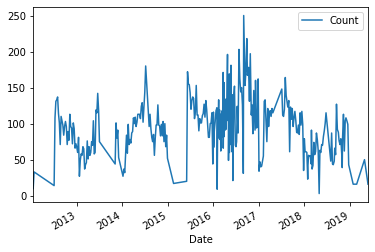

In [59]:
total_count.plot(y='Count')

In [60]:
merged_data['Type'].unique()

array(['Declined', 'Individual', 'Business', 'No Receipt'], dtype=object)

In [61]:
declined_count = merged_data.loc[merged_data['Type'] == 'Declined']

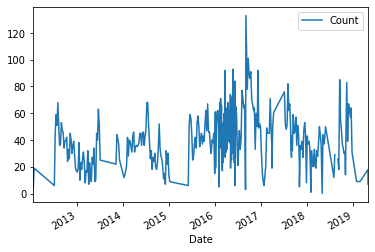

In [62]:
declined_count.plot(y='Count')

In [63]:
individual_count = merged_data.loc[merged_data['Type'] == 'Individual']

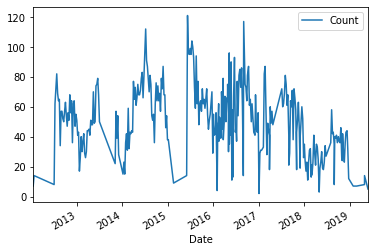

In [64]:
individual_count.plot(y='Count')

In [65]:
business_count = merged_data.loc[merged_data['Type'] == 'Business']

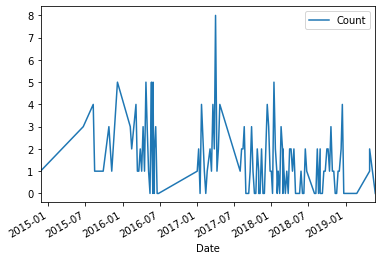

In [66]:
business_count.plot(y='Count')

In [67]:
no_count = merged_data.loc[merged_data['Type'] == 'No Receipt']

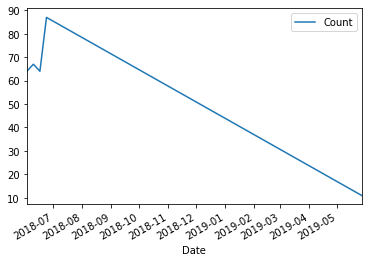

In [68]:
no_count.plot(y='Count')

In [69]:
month_total = total_count.groupby(by=[total_count.index.month]).aggregate({'Count': 'sum'})

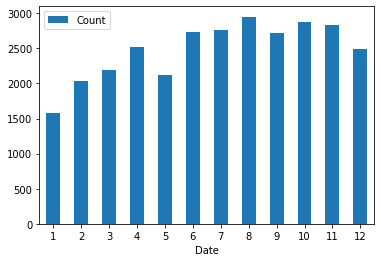

In [70]:
month_total.plot.bar(rot=0)

In [71]:
geo = pd.read_csv('habitat_data/datasets/donations_by_day_2012_2016.csv')

In [79]:
geo = geo[pd.notnull(geo['Address'])]

In [85]:
from pygeocoder import Geocoder
import requests

In [84]:
Geocoder.geocode('11 Park SQ, Metuch, NJ').valid_address

GeocoderError: Error REQUEST_DENIED
Query: https://maps.google.com/maps/api/geocode/json?address=11+Park+SQ%2C+Metuch%2C+NJ&sensor=false&bounds=&region=&language=&components=

In [89]:
url = 'https://maps.googleapis.com/maps/api/geocode/json'
params = {'sensor': 'false', 'address': 'Mountain View, CA'}
r = requests.get(url, params=params)
r.json()
#results = r.json()['results']
#location = results[0]['geometry']['location']
#location['lat'], location['lng']

{'error_message': 'You must use an API key to authenticate each request to Google Maps Platform APIs. For additional information, please refer to http://g.co/dev/maps-no-account',
 'results': [],
 'status': 'REQUEST_DENIED'}

In [92]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="specify_your_app_name_here")
location = geolocator.geocode("CR N, Rantoul")
print(location.address)

Rantoul, Champaign County, Illinois, 61866, United States of America


In [99]:
geo['Lat'] = None
geo['Long'] = None

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [108]:
#geo['Address'].apply(lambda x: geolocator.geocode(x))
i = 0
for index, row in geo.iterrows():
        try:
            geolocator = Nominatim(user_agent="specify_your_app_name_here")
            location = geolocator.geocode(row['Address'])
        except:
            i += 1
        
        if location is None:
            i+= 1
            continue
        geo.set_value(index,'Lat',location.latitude)
        geo.set_value(index,'Long',location.longitude)
        i+=1
        if i % 10 == 0:
            print(i)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


10
20
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
300
310
330
340
350
360
370
380
390
400
430
460
470
480
490
510
520
540
550
560
570
580
590
600
610
620
630
650
660
670
680
690
710
720
730
740
750
760
770
790
830
880
890
900
910
930
960
970
1000
1020
1040
1060
1080
1090
1100
1120
1150
1160
1170
1180
1190
1200
1210
1220
1240
1280
1300
1320
1330
1340
1390
1400
1410
1430
1440
1450
1460
1480
1530
1550
1570
1580
1590
1600
1610
1620
1640
1650
1660
1670
1700
1710
1720
1790
1820
1870
1880
1890
1900
1920
1930
1950
1980
1990
2000
2020
2040
2050
2070
2080
2110
2120
2160
2170
2180
2190
2200
2210
2230
2240
2250
2260
2270
2280
2290
2300
2330
2340
2350
2360
2370
2380
2400
2410
2420
2430
2450
2470
2480
2490
2500
2520
2530
2550
2560
2570
2580
2590
2600
2610
2620
2630
2640
2650
2660
2670
2680
2690
2710
2720
2730
2740
2750
2760
2770
2780
2790
2800
2810
2820
2840
2860
2870
2880
2890
2900
2910
2920
2930
2950
2960
2970
2980
2990
3000
3010
3020
3030
3040
305

In [116]:
geo = geo[pd.notnull(geo['Lat'])]

In [117]:
geo

,ID,Date,DayOfWeek,Type,ReceiptDeclined,Address,AddToMailingList,VolunteerInterest,NoOfDonations,Notes,Lat,Long
0,1,8/14/2015,Friday,NaN,NaN,"CR N, Rantoul",n,n,1.0,NaN,40.3084,-88.1559
1,2,8/14/2015,Friday,NaN,NaN,"Delmar Ave, Champaign",n,n,1.0,NaN,40.1232,-88.2974
2,3,8/14/2015,Friday,NaN,NaN,"Turkey Farm Rd, Mahomet",n,n,1.0,NaN,40.2018,-88.4267
4,5,8/14/2015,Friday,NaN,NaN,"B Patton Dr, Mahomet",n,n,1.0,NaN,40.1857,-88.3798
5,6,8/14/2015,Friday,NaN,NaN,"Brighton Dr, Urbana IL",n,n,1.0,NaN,40.093,-88.1961
...,...,...,...,...,...,...,...,...,...,...,...,...
10063,10064,8/13/2015,Thursday,NaN,NaN,"Burkwood Ct. W, Urbana",n,n,1.0,NaN,40.0965,-88.2048
10064,10065,8/13/2015,Thursday,NaN,NaN,"Clubhouse, Champaign",n,n,1.0,NaN,40.1052,-88.1901
10065,10066,8/13/2015,Thursday,NaN,NaN,"CR N, Dewey IL",n,n,1.0,NaN,45.1789,-100.859
10066,10067,8/13/2015,Thursday,NaN,NaN,"Willow Lane, Mission Hills, KS",n,y,1.0,NaN,39.0103,-94.6134


In [118]:
import gmplot
# For improved table display in the notebook
from IPython.display import display

In [123]:
latitudes = geo["Lat"]
longitudes = geo["Long"]
gmap = gmplot.GoogleMapPlotter(34.0522, -118.2437, 10)
gmap.heatmap(latitudes, longitudes)
gmap.draw("t_heatmap.html")

In [121]:
geo.to_csv('geo.csv')